### *** Description ***

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

In Kaggle Datasets' inaugural Data Science for Good challenge, Kiva is inviting the Kaggle community to help them build more localized models to estimate the poverty levels of residents in the regions where Kiva has active loans. Unlike traditional machine learning competitions with rigid evaluation criteria, participants will develop their own creative approaches to addressing the objective. Instead of making a prediction file as in a supervised machine learning problem, submissions in this challenge will take the form of Python and/or R data analyses using Kernels, Kaggle's hosted Jupyter Notebooks-based workbench.

Kiva has provided a dataset of loans issued over the last two years, and participants are invited to use this data as well as source external public datasets to help Kiva build models for assessing borrower welfare levels. Participants will write kernels on this dataset to submit as solutions to this objective and five winners will be selected by Kiva judges at the close of the event. In addition, awards will be made to encourage public code and data sharing. With a stronger understanding of their borrowers and their poverty levels, Kiva will be able to better assess and maximize the impact of their work.

The sections that follow describe in more detail how to participate, win, and use available resources to make a contribution towards helping Kiva better understand and help entrepreneurs around the world.

### *** Problem Statement ***

For the locations in which Kiva has active loans, your objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

Kernels submitted will be evaluated based on the following criteria:

1. Localization - How well does a submission account for highly localized borrower situations? Leveraging a variety of external datasets and successfully building them into a single submission will be crucial.

2. Execution - Submissions should be efficiently built and clearly explained so that Kiva’s team can readily employ them in their impact calculations.

3. Ingenuity - While there are many best practices to learn from in the field, there is no one way of using data to assess welfare levels. It’s a challenging, nuanced field and participants should experiment with new methods and diverse datasets.

In [27]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the csv files onto the pandas dataframe
kloans = pd.read_csv('kiva_loans.csv')
kmpi = pd.read_csv('kiva_mpi_region_locations.csv')
kloanid = pd.read_csv('loan_theme_ids.csv')
kloantheme = pd.read_csv('loan_themes_by_region.csv')

In [28]:
# Get some basic information regarding the kiva loans and display the first 10 observations in the dataframe
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
sns.set(palette=sns.color_palette('cubehelix', 8))

kloans.info()
kloans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666977 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

<p> Questions that can be asked for Data Analysis: </p>
1. funded_amount by country, funded_amount by region, funded_amount by activity, funded_amount by sector
    1. ***use bar plots, box plots for all of these***
2. categorize the disbursed_time into months and year to figure out the following:
    1. funded_amount & loan_amount by months, funded_amount & loan_amount by year
        1. ***line chart and bar plots for these insights***
    2. funded_amount by country & region by months and year
        1. ***line chart and bar plots for these insights
3. various activities in sectors
    1. ***use networkx for the visualization***
4. count of top 10 use
    1. ***bar plot***
5. histogram of various term_in_month, repayment_interval, lender_count
    1. ***histogram to get frequency***

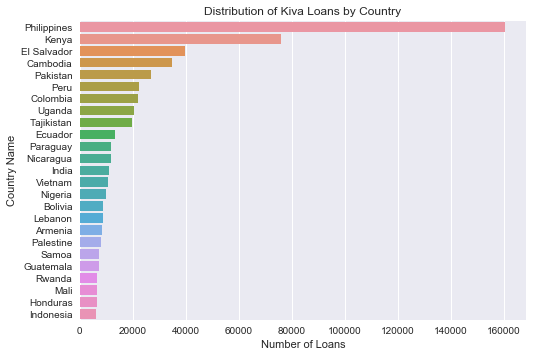

In [4]:
# The following code shows the total number of loans in the top 25 countries
sns.countplot(y="country", data=kloans, 
              order=kloans.country.value_counts().iloc[:25].index).set_title("Distribution of Kiva Loans by Country")
plt.ylabel('Country Name')
plt.xlabel('Number of Loans')
plt.show()

*** <p> Philippines which has the highest number of loans has more than twice the number of loans as compared to Kenya. However, I would focus on getting more information regarding the poverty levels of regions in India. </p> ***

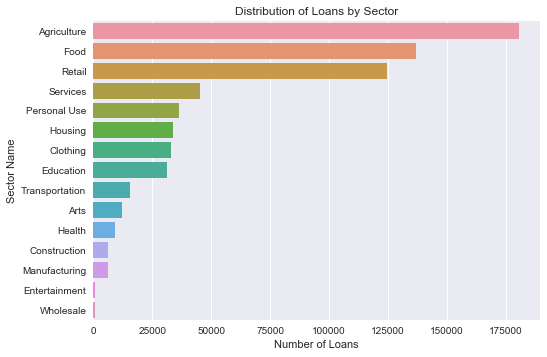

In [5]:
# The following code shows the distribution of loans by sector
sns.countplot(y='sector', data=kloans, order=kloans.sector.value_counts().index).set_title("Distribution of Loans by Sector")
plt.ylabel("Sector Name")
plt.xlabel("Number of Loans")
plt.show()

*** <p> Agriculture, Food, and Retail are the top three sectors for which people ask for loans. </p> ***

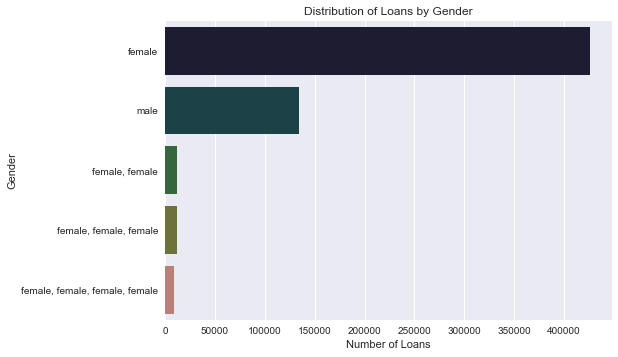

In [6]:
# The following code shows the number of loans by Gender
sns.countplot(y='borrower_genders', data = kloans, order=kloans.borrower_genders.value_counts().iloc[:5].index).set_title("Distribution of Loans by Gender")
plt.ylabel("Gender")
plt.xlabel("Number of Loans")
plt.show()

*** <p> Females have three times the number of loans as compared to the males. However, we see that there are more than two genders in the countplot which means that loans can be given to joint applicants. This needs to be sorted out. We will delve into it later. </p> *** 

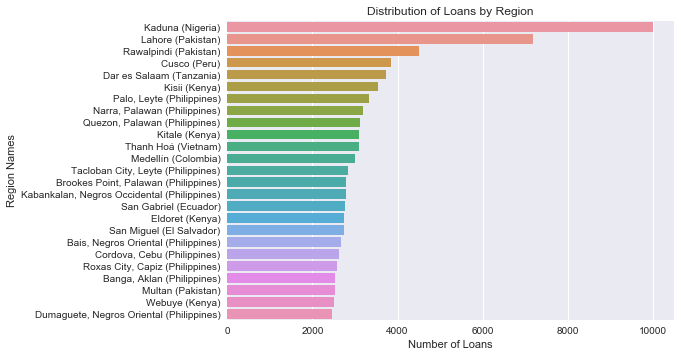

In [7]:
# The following code joins the region and country columns so that when viewing the different regions, we could get a sense of which
# country does that region belong to.

trial = kloans.dropna(axis=0, how='any', subset = ['country', 'region'])
trial['merged'] = trial[['region', 'country']].apply(lambda x: ' ('.join(x) + ')', axis=1)

# The following code shows distribution of loans by region for the top 25 regions (along with country name)
sns.countplot(y='merged', data=trial, order=trial.merged.value_counts().iloc[:25].index).set_title("Distribution of Loans by Region")
plt.ylabel("Region Names")
plt.xlabel("Number of Loans")
plt.show()

***<p> It can be seen that Kaduna (Nigeria) has the highest number of loans followed by Lahore (Pakistan) </p>***

In [41]:
# The following code plots the number of loans in various countries on the world map. We use plotly for this purpose.

import plotly as py
%matplotlib inline

# Create num_loans which stores the country's total number of loans
num_loans = kloans.groupby('country').count()['loan_amount'].sort_values(ascending=False)

data = [dict(
        type = 'choropleth',
        locations = num_loans.index,
        locationmode='country names',
        z=num_loans.values,
        text=num_loans.index,
        reversescale=False,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='# loans'),
        )]

layout = dict(title = 'Number of Loans',
              showframe=False,
              showcoastlines=True,
              projection=dict(type='Mercator'),
              margin=dict(t=50, b=30,l=10,r=10))

fig = dict(data=data, layout=layout)
py.offline.plot(fig, validate=False, filename='number-loans.html')

'file://C:\\Users\\apanc\\Documents\\Springboard\\Data Science Career Track\\Kiva Capstone Project\\number-loans.html'

In [7]:
kmpi.info()
kmpi.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   
5    Daykundi, Afghanistan  AFG  Afghanistan    Daykundi   South Asia  0.313   
6       Farah, Afghanistan  AFG  Afghanistan       Farah   South Asia  0.319   
7      Faryab, Afghanistan  AFG  Afghanistan      Faryab   South Asia  0.250   
8      Ghazni, Afghanistan  AFG  Afghanistan      Ghazni   South Asia  0.245   
9        Ghor, Afghanistan  AFG  Afghanistan        Ghor   South Asia  0.384   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210  
5          (33.669495, 66.0463534)  33.669495  66.046353  
6         (32.4464635, 62.1454133)  32.446464  62.145413  
7  (36.0795613, 64.90595499999999)  36.079561  64.905955  
8         (33.5450587, 68.4173972)  33.545059  68.417397  
9  (34.0995776, 64.90595499999999)  34.099578  64.905955

In [63]:
kmpi[kmpi['country']=='Philippines']

LocationName  ISO      country  \
764  National Capital Region, Philippines  PHL  Philippines   
765  Cordillera Admin Region, Philippines  PHL  Philippines   
766            Ilocos Region, Philippines  PHL  Philippines   
767           Cagayan Valley, Philippines  PHL  Philippines   
768            Central Luzon, Philippines  PHL  Philippines   
769               Calabarzon, Philippines  PHL  Philippines   
770                 Mimaropa, Philippines  PHL  Philippines   
771             Bicol Region, Philippines  PHL  Philippines   
772          Western Visayas, Philippines  PHL  Philippines   
773          Central Visayas, Philippines  PHL  Philippines   
774          Eastern Visayas, Philippines  PHL  Philippines   
775      Zamboanga Peninsula, Philippines  PHL  Philippines   
776        Northern Mindanao, Philippines  PHL  Philippines   
777          Davao Peninsula, Philippines  PHL  Philippines   
778             Soccsksargen, Philippines  PHL  Philippines   
779                   CARAGA, Philippines  PHL  Philippines   
780                     Armm, Philippines  PHL  Philippines   

                      region               world_region    MPI  \
764  National Capital Region  East Asia and the Pacific  0.026   
765  Cordillera Admin Region  East Asia and the Pacific  0.039   
766            Ilocos Region  East Asia and the Pacific  0.027   
767           Cagayan Valley  East Asia and the Pacific  0.039   
768            Central Luzon  East Asia and the Pacific  0.035   
769               Calabarzon  East Asia and the Pacific  0.029   
770                 Mimaropa  East Asia and the Pacific  0.091   
771             Bicol Region  East Asia and the Pacific  0.068   
772          Western Visayas  East Asia and the Pacific  0.055   
773          Central Visayas  East Asia and the Pacific  0.055   
774          Eastern Visayas  East Asia and the Pacific  0.054   
775      Zamboanga Peninsula  East Asia and the Pacific  0.075   
776        Northern Mindanao  East Asia and the Pacific  0.093   
777          Davao Peninsula  East Asia and the Pacific  0.066   
778             Soccsksargen  East Asia and the Pacific  0.090   
779                   CARAGA  East Asia and the Pacific  0.069   
780                     Armm  East Asia and the Pacific  0.140   

                                  geo        lat         lon  
764  (15.5942883, -90.14949879999999)  15.594288  -90.149499  
765         (17.3512542, 121.1718851)  17.351254  121.171885  
766         (16.0832144, 120.6199895)  16.083214  120.619990  
767         (16.9753758, 121.8107079)  16.975376  121.810708  
768         (15.4827722, 120.7120023)  15.482772  120.712002  
769         (14.1007803, 121.0793705)  14.100780  121.079371  
770  (9.843206499999999, 118.7364783)   9.843207  118.736478  
771         (13.4209885, 123.4136736)  13.420989  123.413674  
772         (11.0049836, 122.5372741)  11.004984  122.537274  
773         (10.2968562, 123.8886774)  10.296856  123.888677  
774         (12.2445533, 125.0388164)  12.244553  125.038816  
775         (-19.0552009, 29.6035495) -19.055201   29.603549  
776  (8.020163499999999, 124.6856509)   8.020163  124.685651  
777          (6.9581401, 126.2176555)   6.958140  126.217655  
778          (6.2706918, 124.6856509)   6.270692  124.685651  
779  (8.801456199999999, 125.7406882)   8.801456  125.740688  
780  (6.956831299999999, 124.2421597)   6.956831  124.242160

In [40]:
# I am trying to use plotly to visualize the mpi of various locations which does not have NaN in the country, LocationName, or 
# MPI columns

import plotly as py

not_na_country = kmpi[kmpi.country.notnull() & kmpi.LocationName.notnull() & kmpi.MPI.notnull()]
data = [dict(
        type = 'choropleth',
        locations= not_na_country.country,
        locationmode = 'country names',
        z=not_na_country.MPI,
        #colorscale = [[0,'rgb(128, 0, 0)'],[1,'rgb(217, 179, 140)']],
        reversescale=False,
        colorbar=dict(autotick=False, tickprefix='', title='MPI'),
        text=not_na_country.LocationName)]

layout = dict(
            title = 'MPI of Countries',
            geo=dict(
            showframe=False,
            showcoastlines=True,
            projection=dict(type = 'Mercator'),
            margin = dict(t=30, b=30, l=10, r=10)))

fig=dict(data=data, layout=layout)
py.offline.plot(fig, validate=False, filename='mpi-plot.html')

'file://C:\\Users\\apanc\\Documents\\Springboard\\Data Science Career Track\\Kiva Capstone Project\\mpi-plot.html'

In [86]:
help(plotly.graph_objs.layout._geo)

Help on module plotly.graph_objs.layout._geo in plotly.graph_objs.layout:

NAME
    plotly.graph_objs.layout._geo

CLASSES
    plotly.basedatatypes.BaseLayoutHierarchyType(plotly.basedatatypes.BasePlotlyType)
        Geo
    
    class Geo(plotly.basedatatypes.BaseLayoutHierarchyType)
     |  Base class for all types in the layout hierarchy
     |  
     |  Method resolution order:
     |      Geo
     |      plotly.basedatatypes.BaseLayoutHierarchyType
     |      plotly.basedatatypes.BasePlotlyType
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, arg=None, bgcolor=None, center=None, coastlinecolor=None, coastlinewidth=None, countrycolor=None, countrywidth=None, domain=None, framecolor=None, framewidth=None, lakecolor=None, landcolor=None, lataxis=None, lonaxis=None, oceancolor=None, projection=None, resolution=None, rivercolor=None, riverwidth=None, scope=None, showcoastlines=None, showcountries=None, showframe=None, showlakes=None, s

In [8]:
kloanid.info()
kloanid.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
id                 779092 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0
5  642256  a1050000000T3oX          Extreme Poverty       217.0
6  642311  a1050000000snTK                  General        57.0
7  642353  a1050000000T3oX          Extreme Poverty       217.0
8  642386  a1050000000wf0f                  General       133.0
9  642429  a1050000000wezJ                  General        48.0

In [9]:
kloantheme.info()
kloantheme.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15736 non-null int64
Field Partner Name    15736 non-null object
sector                15736 non-null object
Loan Theme ID         15736 non-null object
Loan Theme Type       15736 non-null object
country               15736 non-null object
forkiva               15736 non-null object
region                15736 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15736 non-null int64
amount                15736 non-null int64
LocationName          15736 non-null object
geocode               13662 non-null object
names                 13661 non-null object
geo                   15736 non-null object
lat                   13662 non-null float64
lon                   13662 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     

Partner ID               Field Partner Name                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   
5           9  KREDIT Microfinance Institution  General Financial Inclusion   
6           9  KREDIT Microfinance Institution  General Financial Inclusion   
7           9  KREDIT Microfinance Institution  General Financial Inclusion   
8           9  KREDIT Microfinance Institution  General Financial Inclusion   
9           9  KREDIT Microfinance Institution  General Financial Inclusion   

     Loan Theme ID         Loan Theme Type   country forkiva  \
0  a1050000000slfi        Higher Education  Cambodia      No   
1  a10500000068jPe  Vulnerable Populations  Cambodia      No   
2  a1050000000slfi        Higher Education  Cambodia      No   
3  a10500000068jPe  Vulnerable Populations  Cambodia      No   
4  a1050000002X1Uu              Sanitation  Cambodia      No   
5  a1050000000slfi        Higher Education  Cambodia      No   
6  a1050000007VvXr      Solar Home Systems  Cambodia      No   
7  a1050000000weyk                 General  Cambodia      No   
8  a1050000007VvXr      Solar Home Systems  Cambodia      No   
9  a1050000000slfi        Higher Education  Cambodia      No   

                     region     geocode_old  ISO  number  amount  \
0          Banteay Meanchey  (13.75, 103.0)  KHM       1     450   
1       Battambang Province             NaN  KHM      58   20275   
2       Battambang Province             NaN  KHM       7    9150   
3     Kampong Cham Province   (12.0, 105.5)  KHM    1383  604950   
4     Kampong Cham Province   (12.0, 105.5)  KHM       3     275   
5     Kampong Cham Province   (12.0, 105.5)  KHM      36   62225   
6     Kampong Cham Province   (12.0, 105.5)  KHM       2    1300   
7  Kampong Chhnang Province   (12.0, 104.5)  KHM     249  237175   
8  Kampong Chhnang Province   (12.0, 104.5)  KHM       7    3050   
9  Kampong Chhnang Province   (12.0, 104.5)  KHM      18   31425   

                         LocationName                      geocode  \
0          Banteay Meanchey, Cambodia  [(13.6672596, 102.8975098)]   
1       Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
2       Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
3     Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
4     Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
5     Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
6     Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
7  Kampong Chhnang Province, Cambodia  [(12.1392352, 104.5655273)]   
8  Kampong Chhnang Province, Cambodia  [(12.1392352, 104.5655273)]   
9  Kampong Chhnang Province, Cambodia  [(12.1392352, 104.5655273)]   

                                 names                        geo        lat  \
0  Banteay Meanchey Province; Cambodia  (13.6672596, 102.8975098)  13.667260   
1        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
2        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
3      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
4      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
5      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
6      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
7   Kampong Chhnang Province; Cambodia  (12.1392352, 104.5655273)  12.139235   
8   Kampong Chhnang Province; Cambodia  (12.1392352, 104.5655273)  12.139235   
9   Kampong Chhnang Province; Cambodia  (12.1392352, 104.5655273)  12.139235   

          lon              

In [9]:
# Trying out plotly
import plotly
print(plotly.__version__)
plotly.offline.init_notebook_mode()
plotly.offline.iplot({
   "data": [{
        "x":[1,2,3],
        "y":[4,5,6]}],
    "layout": {"title": "Hello World"}
})

3.2.0


In [71]:
help(plotly)

Help on package plotly:

NAME
    plotly - https://plot.ly/python/

DESCRIPTION
    Plotly's Python API allows users to programmatically access Plotly's
    server resources.
    
    This package is organized as follows:
    
    Subpackages:
    
    - plotly: all functionality that requires access to Plotly's servers
    
    - graph_objs: objects for designing figures and visualizing data
    
    - matplotlylib: tools to convert matplotlib figures
    
    Modules:
    
    - tools: some helpful tools that do not require access to Plotly's servers
    
    - utils: functions that you probably won't need, but that subpackages use
    
    - version: holds the current API version
    
    - exceptions: defines our custom exception classes

PACKAGE CONTENTS
    animation
    api (package)
    basedatatypes
    basewidget
    callbacks
    colors
    config
    dashboard_objs (package)
    exceptions
    figure_factory (package)
    files
    graph_objs (package)
    graph_reference
 

In [11]:
check=kloantheme.dropna(subset=['lon','lat']).drop_duplicates(subset=['lon','lat'])
len(check)

6557

In [12]:
# I am not able to get the output for the following code:

import folium
# import html
from folium.plugins import MarkerCluster
check1 = kloantheme.dropna(subset=['lat', 'lon']).drop_duplicates(subset=['lat', 'lon'])
parse_html = True
m3 = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
# marker = MarkerCluster().add_to(m3)
for i in range(0,len(check1)):
    folium.Marker([check1.iloc[i]['lat'], check1.iloc[i]['lon']], popup=folium.Popup(check1.iloc[i]['region'], parse_html=True)).add_to(m3)

In [13]:
m3.save('checking.html')

In [25]:
# Able to get the output when data set from individual country is selected. The following code uses data set of India.

import folium
# trial=kloantheme['region'].value_counts()
# region = check.drop_duplicates(subset=['lat','lon'])
india = check.loc[check['country']=='India']
india.head()
m = folium.Map(location=[20,80], tiles="Mapbox Bright", zoom_start=4.5)
folium.TileLayer('Mapbox Control Room').add_to(m)
folium.TileLayer('stamenterrain').add_to(m)
folium.TileLayer('stamentoner').add_to(m)
folium.TileLayer('stamenwatercolor').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

for i in range(0,len(india)):
    folium.Marker(
        [india.iloc[i]['lat'], india.iloc[i]['lon']], popup=india.iloc[i]['region']
    ).add_to(m)
m

In [26]:
# Trying out marker cluster and able to get the output

from folium.plugins import MarkerCluster
m2 = folium.Map(location=[20,80], tiles="Mapbox Bright", zoom_start=4)
marker_cluster = MarkerCluster().add_to(m2)
for i in range(0,len(india)):
    folium.Marker([india.iloc[i]['lat'], india.iloc[i]['lon']], popup=india.iloc[i]['region']).add_to(marker_cluster)
m2

# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(marker_cluster)
# map2

In [144]:
india.head(50)

Partner ID Field Partner Name                       sector  \
11972         225             Novica                      Artisan   
11986         225             Novica                      Artisan   
11987         225             Novica                      Artisan   
11994         225             Novica                      Artisan   
12085         238      WSDS-Initiate  General Financial Inclusion   
12086         238      WSDS-Initiate  General Financial Inclusion   
12087         238      WSDS-Initiate  General Financial Inclusion   
12088         238      WSDS-Initiate  General Financial Inclusion   
12114         241     People's Forum  General Financial Inclusion   
12118         241     People's Forum  General Financial Inclusion   
12121         241     People's Forum  General Financial Inclusion   
12123         241     People's Forum  General Financial Inclusion   
12127         241     People's Forum  General Financial Inclusion   
12130         241     People's Forum  General Financial Inclusion   
12134         241     People's Forum  General Financial Inclusion   
12135         241     People's Forum  General Financial Inclusion   
12136         241     People's Forum  General Financial Inclusion   
12138         241     People's Forum  General Financial Inclusion   
12140         241     People's Forum  General Financial Inclusion   
12144         241     People's Forum  General Financial Inclusion   
12147         241     People's Forum  General Financial Inclusion   
12148         241     People's Forum  General Financial Inclusion   
12149         241     People's Forum  General Financial Inclusion   
12152         241     People's Forum  General Financial Inclusion   
12153         241     People's Forum  General Financial Inclusion   
12154         241     People's Forum  General Financial Inclusion   
12155         241     People's Forum  General Financial Inclusion   
12156         241     People's Forum  General Financial Inclusion   
12157         241     People's Forum  General Financial Inclusion   
12159         241     People's Forum  General Financial Inclusion   
12160         241     People's Forum  General Financial Inclusion   
12161         241     People's Forum  General Financial Inclusion   
12162         241     People's Forum  General Financial Inclusion   
12163         241     People's Forum  General Financial Inclusion   
12165         241     People's Forum  General Financial Inclusion   
12170         241     People's Forum  General Financial Inclusion   
12173         241     People's Forum  General Financial Inclusion   
12176         241     People's Forum  General Financial Inclusion   
12177         241     People's Forum  General Financial Inclusion   
12180         241     People's Forum  General Financial Inclusion   
12183         241     People's Forum  General Financial Inclusion   
12184         241     People's Forum  General Financial Inclusion   
12185         241     People's Forum  General Financial Inclusion   
12187         241     People's Forum  General Financial Inclusion   
12191         241     People's Forum  General Financial Inclusion   
12195         241     People's Forum  General Financial Inclusion   
12198         241     People's Forum  General Financial Inclusion   
12201         241     People's Forum  General Financial Inclusion   
12202         241     People's Forum  General Financial Inclusion   
12207         241     People's Forum  General Financial Inclusion   

         Loan Theme ID         Loan Theme Type country forkiva  \
11972  a1050000000T14Q                 Artisan   India      No   
11986  a1050000000T14Q                 Artisan   India      No   
11987  a1050000000T14Q                 Artisan   India      No   
11994  a1050000000T14Q                 Artisan   India      No   
12085  a1050000000sjE7             Underserved   India      No   
12086  a1050000000sjE7             Underserved   India      No   
12087  a1050000000sjE7   

In [5]:
help(folium)

Help on package folium:

NAME
    folium - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    _version
    features
    folium
    map
    plugins (package)
    raster_layers
    utilities
    vector_layers

CLASSES
    builtins.object
        branca.element.Element
            branca.element.Figure
                branca.element.Div
            branca.element.Html
            branca.element.IFrame
            branca.element.Link
                branca.element.CssLink
                branca.element.JavascriptLink
            branca.element.MacroElement
                branca.colormap.ColorMap
                    branca.colormap.LinearColormap
                    branca.colormap.StepColormap
                folium.features.ClickForMarker
                folium.features.DivIcon
                folium.features.LatLngPopup
                folium.folium.Map
                folium.map.FitBounds
                folium.map.Icon
                    folium.features.CustomIcon
                folium.m

The goal of the project is to provide granular level details regarding the poverty level of the region based on gender, sector, etc. to investors. The following are the hypothesis so far (as of 10/19/2018): 
<p>*** 1. The regions with the higher mpi score would have higher number of loan applications. ***</p>
<p>*** 2. The regions with the higher mpi score would ask for lower amounts of loans. ***</p>
<p>*** 3. People living in regions with higher mpi score would apply for loans which fulfill the basic needs like health and food. *** </p>

In [42]:
merged = pd.merge(left=kloans, right=kmpi, how='inner', on = ['country', 'region'])
merged.head()

id  funded_amount  loan_amount          activity    sector  \
0  653359          600.0        600.0  Machinery Rental  Services   
1  653373         1000.0       1000.0     Grocery Store      Food   
2  653364          250.0        250.0     Fuel/Firewood    Retail   
3  653367          175.0        175.0       Food Market      Food   
4  653396          800.0        800.0    Clothing Sales  Clothing   

                                                 use country_code    country  \
0  to invest in working capital and to maintain g...           NI  Nicaragua   
1  to invest in working capital and to provide hi...           NI  Nicaragua   
2          to buy firewood to offer to her customers           NI  Nicaragua   
3  to invest in working capital and stock up her ...           NI  Nicaragua   
4  to invest in working capital to stock their bu...           NI  Nicaragua   

  region currency  partner_id                posted_time  \
0   Leon      NIO        96.0  2014-01-02 14:25:08+00:00   
1   Leon      NIO        96.0  2014-01-02 15:26:18+00:00   
2   Leon      NIO        96.0  2014-01-02 14:48:57+00:00   
3   Leon      NIO        96.0  2014-01-02 15:07:23+00:00   
4   Leon      NIO        96.0  2014-01-02 17:01:15+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-08 22:07:48+00:00            14.0   
1  2013-12-06 08:00:00+00:00  2014-01-31 14:29:51+00:00            14.0   
2  2013-12-17 08:00:00+00:00  2014-01-05 14:27:49+00:00            14.0   
3  2013-12-03 08:00:00+00:00  2014-01-02 22:20:53+00:00            14.0   
4  2013-12-03 08:00:00+00:00  2014-01-14 18:52:52+00:00             9.0   

   lender_count                                               tags  \
0            16                                            #Parent   
1            20  #Parent, #Inspiring Story, #First Loan, user_f...   
2             8  volunteer_pick, user_favorite, #Single Parent,...   
3             5                                                NaN   
4             7      #Parent, #Supporting Family, #Woman Owned Biz   

         borrower_genders repayment_interval        date     LocationName  \
0                  female            monthly  2014-01-02  Leon, Nicaragua   
1                    male            monthly  2014-01-02  Leon, Nicaragua   
2                  female            monthly  2014-01-02  Leon, Nicaragua   
3                  female            monthly  2014-01-02  Leon, Nicaragua   
4  female, female, female            monthly  2014-01-02  Leon, Nicaragua   

   ISO                 world_region    MPI                       geo  \
0  NIC  Latin America and Caribbean  0.031  (28.3998551, 83.6895693)   
1  NIC  Latin America and Caribbean  0.031  (28.3998551, 83.6895693)   
2  NIC  Latin America and Caribbean  0.031  (28.3998551, 83.6895693)   
3  NIC  Latin America and Caribbean  0.031  (28.3998551, 83.6895693)   
4  NIC  Latin America and Caribbean  0.031  (28.3998551, 83.6895693)   

         lat        lon  
0  28.399855  83.689569  
1  28.399855  83.689569  
2  28.399855  83.689569  
3  28.399855  83.689569  
4  28.399855  83.689569

In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52197 entries, 0 to 52196
Data columns (total 27 columns):
id                    52197 non-null int64
funded_amount         52197 non-null float64
loan_amount           52197 non-null float64
activity              52197 non-null object
sector                52197 non-null object
use                   52004 non-null object
country_code          52197 non-null object
country               52197 non-null object
region                50955 non-null object
currency              52197 non-null object
partner_id            52197 non-null float64
posted_time           52197 non-null object
disbursed_time        52197 non-null object
funded_time           48681 non-null object
term_in_months        52197 non-null float64
lender_count          52197 non-null int64
tags                  39273 non-null object
borrower_genders      52005 non-null object
repayment_interval    52197 non-null object
date                  52197 non-null object
LocationN

In [2]:
help(pd.merge)

Help on function merge in module pandas.tools.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
    Merge DataFrame objects by performing a database-style join operation by
    columns or indexes.
    
    If joining columns on columns, the DataFrame indexes *will be
    ignored*. Otherwise if joining indexes on indexes or indexes on a column or
    columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        * left: use only keys from left frame (SQL: left outer join)
        * right: use only keys from right frame (SQL: right outer join)
        * outer: use union of keys from both frames (SQL: full outer join)
        * inner: use intersection of keys from both frames (SQL: inner join)
    on : label or list
        Field names to jo

In [10]:
merged_not_null = merged[merged.notnull()]
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52197 entries, 0 to 52196
Data columns (total 27 columns):
id                    52197 non-null int64
funded_amount         52197 non-null float64
loan_amount           52197 non-null float64
activity              52197 non-null object
sector                52197 non-null object
use                   52004 non-null object
country_code          52197 non-null object
country               52197 non-null object
region                50955 non-null object
currency              52197 non-null object
partner_id            52197 non-null float64
posted_time           52197 non-null object
disbursed_time        52197 non-null object
funded_time           48681 non-null object
term_in_months        52197 non-null float64
lender_count          52197 non-null int64
tags                  39273 non-null object
borrower_genders      52005 non-null object
repayment_interval    52197 non-null object
date                  52197 non-null object
LocationN